In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("국가별_데이터_전처리_세계.csv")

In [6]:
df = df.drop(columns=['API'])
df

,COUNTRY,GDP,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,World,Generation (billion kWh),8017.590351,8073.384883,8255.488344,8594.771855,9085.148539,9463.924684,9660.179602,10100.193890,...,21745.3134,22439.6649,22848.81061,23292.89244,23971.02703,24690.70321,25517.59233,25887.40675,25884.19205,27295.18105
1,World,Nuclear (billion kWh),684.380219,778.641895,866.986700,982.492561,1197.846116,1426.475180,1518.769659,1655.306141,...,2347.094711,2364.296125,2419.59673,2448.167422,2488.986259,2517.092414,2570.084944,2668.764457,2595.765186,2698.336227
2,World,Fossil fuels (billion kWh),5588.874065,5525.695248,5563.292389,5703.434012,5912.569199,6043.397153,6103.535132,6398.839904,...,14694.88124,15035.67031,15155.13098,15355.58136,15609.80722,15947.52462,16303.56506,16250.8019,15835.01539,16832.81916
3,World,Renewables (billion kWh),1754.115066,1779.940740,1833.719255,1918.578282,1985.996761,2006.733249,2051.783153,2061.655361,...,4730.884193,5067.589523,5304.49303,5518.761659,5909.312178,6265.593148,6681.431745,7004.802955,7491.473097,7801.504076
4,World,Hydroelectricity (billion kWh),1722.568090,1746.762664,1790.224237,1871.988606,1933.867667,1952.058454,1991.789856,1995.836318,...,3630.080255,3760.824482,3831.164948,3845.429486,3983.153727,4028.09077,4160.594844,4184.030315,4322.70771,4224.734108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,Wake Island,GDP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5976,Western Sahara,GDP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5977,Yemen,GDP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,114.6352,120.7578,107.2665,68.589,58.27781,52.1161,51.68769,52.43262,53.06368,52.53303
5978,Zambia,GDP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.14201,50.57666,52.92406,54.48295,56.52769,58.52103,60.89284,61.7948,59.952,62.84298


In [8]:
# melt 함수를 사용하여 열에서 행으로 데이터 변환
df2 = pd.melt(df, id_vars=['COUNTRY', 'GDP'], var_name='Year', value_name='Value')

# 결과 출력
df2.tail()

,COUNTRY,GDP,Year,Value
251155,Wake Island,GDP,2021,0
251156,Western Sahara,GDP,2021,0
251157,Yemen,GDP,2021,52.53303
251158,Zambia,GDP,2021,62.84298
251159,Zimbabwe,GDP,2021,37.54586


In [9]:
df2['Value'] = df2['Value'].astype(float)

ValueError: could not convert string to float: 'ie'

In [10]:
df2.loc[df2['Value'] == '--', 'Value'] = 0
df2.loc[df2['Value'] == 'ie', 'Value'] = 0

In [13]:
df2['Year'] = df2['Year'].astype(int)
df2['Value'] = df2['Value'].astype(float)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251160 entries, 0 to 251159
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   COUNTRY  251160 non-null  object 
 1   GDP      251160 non-null  object 
 2   Year     251160 non-null  int32  
 3   Value    251160 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 6.7+ MB


In [15]:
df2 = df2.rename(columns={'GDP': 'Composite_Indicators'})

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251160 entries, 0 to 251159
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   COUNTRY               251160 non-null  object 
 1   Composite_Indicators  251160 non-null  object 
 2   Year                  251160 non-null  int32  
 3   Value                 251160 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 6.7+ MB


In [19]:
df2 = df2.pivot(index=['COUNTRY', 'Year'], columns='Composite_Indicators', values='Value').reset_index()
#df2 = df2.drop('Composite_Indicators', axis=1)
df2

Composite_Indicators,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,"Nuclear, renewables, and other (quad Btu)",Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh)
0,0,1980,0.000000,1.325965,0.002479,0.231314,0.111101,0.026583,0.231000,0.00000,...,0.007386,0.983550,0.014624,13356.50,0.711000,0.007386,0.00000,0.00000,0.0,0.0
1,0,1981,0.000000,1.509628,0.002604,0.242977,0.166651,0.029949,0.271000,0.00000,...,0.007537,1.100000,0.016668,13171.68,0.721000,0.007537,0.00000,0.00000,0.0,0.0
2,0,1982,0.000000,1.659605,0.003021,0.281853,0.277752,0.031898,0.245000,0.00000,...,0.007391,1.100000,0.016251,12882.52,0.707000,0.007391,0.00000,0.00000,0.0,0.0
3,0,1983,0.000000,2.059605,0.003021,0.281853,0.277752,0.039022,0.254000,0.00000,...,0.007848,1.500000,0.022918,12537.73,0.746000,0.007848,0.00000,0.00000,0.0,0.0
4,0,1984,0.000000,2.065436,0.003083,0.287684,0.277752,0.039202,0.262000,0.00000,...,0.007903,1.500000,0.022981,12204.31,0.757000,0.007903,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,229,2017,0.151000,8.992426,0.060448,5.461868,0.000000,0.154422,3.218560,39.06286,...,0.044062,3.530558,0.049911,14751.10,4.130900,0.044062,0.01100,0.01100,0.0,0.0
9656,229,2018,0.187000,10.290169,0.065284,5.912279,0.000000,0.176781,3.932020,40.89881,...,0.049737,4.377890,0.061759,15052.18,5.254980,0.049737,0.01900,0.01900,0.0,0.0
9657,229,2019,0.189000,9.408047,0.061204,5.468512,0.000000,0.157368,3.850240,38.40398,...,0.040666,3.939535,0.055498,15354.61,4.380599,0.040666,0.02600,0.02600,0.0,0.0
9658,229,2020,0.099000,8.253322,0.052825,4.491685,0.000000,0.143299,3.655663,35.34675,...,0.037482,3.761637,0.052992,15669.67,3.938347,0.037482,0.03400,0.03400,0.0,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['COUNTRY'] = le.fit_transform(df2['COUNTRY'])

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     9660 non-null   int32  
 1   Year                                        9660 non-null   int32  
 2   Biomass and waste (billion kWh)             9660 non-null   float64
 3   CO2 emissions (MMtonnes CO2)                9660 non-null   float64
 4   Coal (quad Btu)                             9660 non-null   float64
 5   Coal and coke (MMtonnes CO2)                9660 non-null   float64
 6   Consumed natural gas (MMtonnes CO2)         9660 non-null   float64
 7   Consumption (quad Btu)                      9660 non-null   float64
 8   Fossil fuels (billion kWh)                  9660 non-null   float64
 9   GDP                                         9660 non-null   float64
 10  Generation (

In [30]:
df2.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)'],
      dtype='object', name='Composite_Indicators')

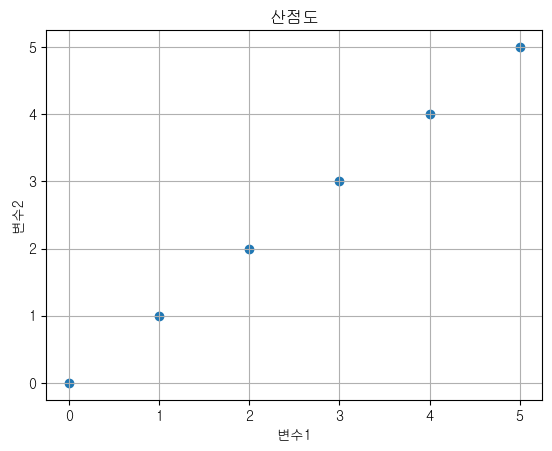

In [21]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from math import sqrt
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [33]:
df3 = df2.copy()

X = df3.drop(['CO2 emissions (MMtonnes CO2)'], axis=1)
y = df3[['CO2 emissions (MMtonnes CO2)']]
#y = df2['합계 소비(1000 toe)']

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle = False)

# MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# 학습 데이터에 대해 fit과 transform 수행
# X_train = scaler.fit_transform(X_train)

# 테스트 데이터에 대해 transform 수행
# X_test = scaler.transform(X_test)

In [34]:
# XGBRegressor 모델 생성 및 학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Predict, mean_absolute_error, rmse 결과 출력
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

302.7625903459591
2351.8756957801293
R-squared: 0.49329567721417955


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

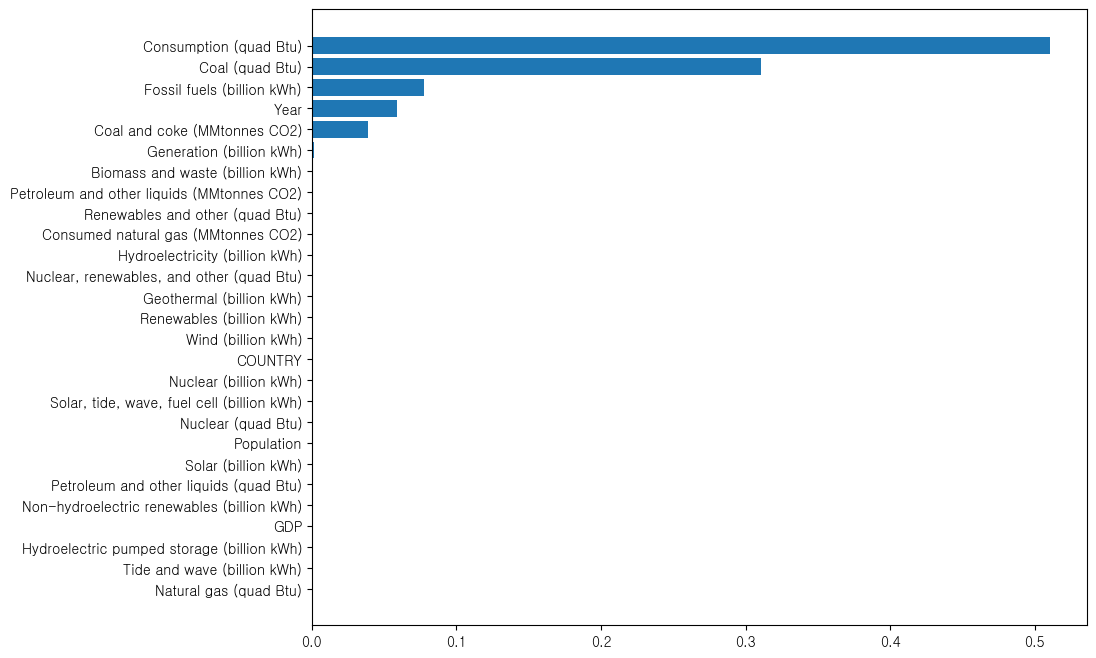

In [35]:
# Feature importance, feature 선언
importances = model_xgb.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [36]:
# LGBMRegressor 모델 생성/학습
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train, y_train)

# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_LGBM.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

LightGBMError: Do not support special JSON characters in feature name.

In [37]:
# Feature importance, feature 선언
importances = model_LGBM.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

NotFittedError: No feature_importances found. Need to call fit beforehand.

In [38]:
# RandomForestRegressor 모델 생성/학습
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Predict를 수행하고 mean_absolute_error와 rmse 결과 출력하기
pred = model_RF.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

260.8798999910614
2045.671615884005
R-squared: 0.6166480121388076


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

In [39]:
# RandomForestRegressor 모델 생성/학습
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

# Predict를 수행하고 mean_absolute_error와 rmse 결과 출력하기
pred = model_RF.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print(f"R-squared: {r2}")

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

254.96077148031188
2041.9091027379154
R-squared: 0.6180568799570483


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

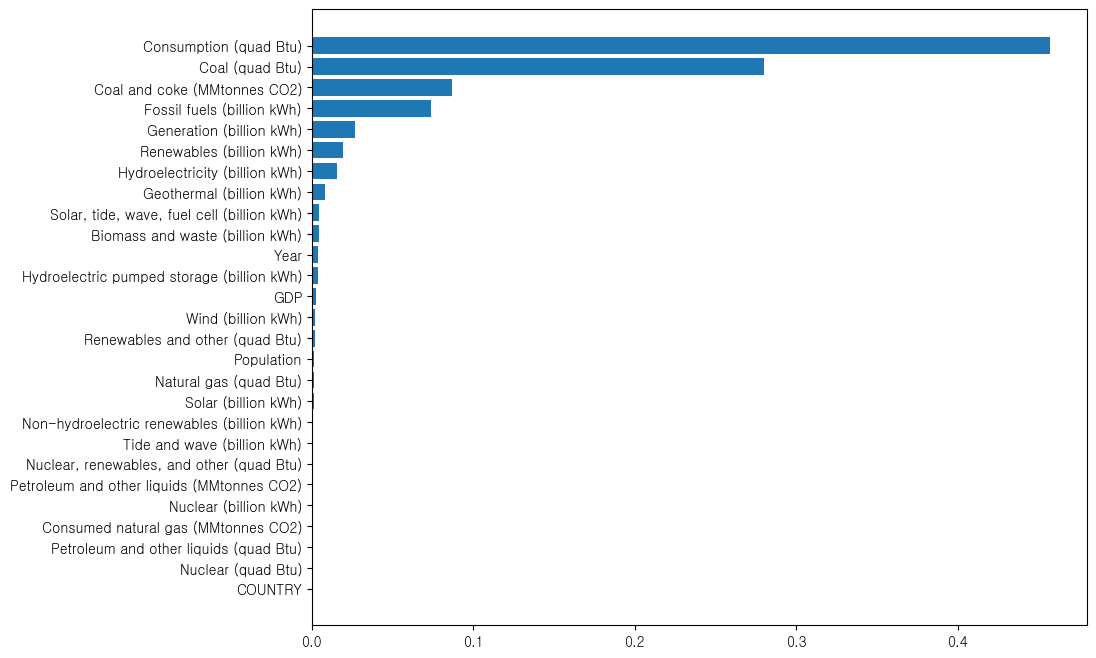

In [40]:
# Feature importance, feature 선언
importances = model_RF.feature_importances_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [49]:
df3.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)'],
      dtype='object', name='Composite_Indicators')

In [52]:
df3 = df2.copy()
# Generation (billion kWh)
#X = df3.drop(['CO2 emissions (MMtonnes CO2)'], axis=1)
# y = df3[['CO2 emissions (MMtonnes CO2)']]
#y = df2['합계 소비(1000 toe)']
X = df3.drop(['Consumption (quad Btu)'], axis=1)
y = df2['Consumption (quad Btu)']
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle = False)


from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=0.5, random_state=43) 
model.fit(X_train, y_train) # 모델 학습

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MAE: 2.99%
RMSE: 12.27%


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDty

0.9995865160986995

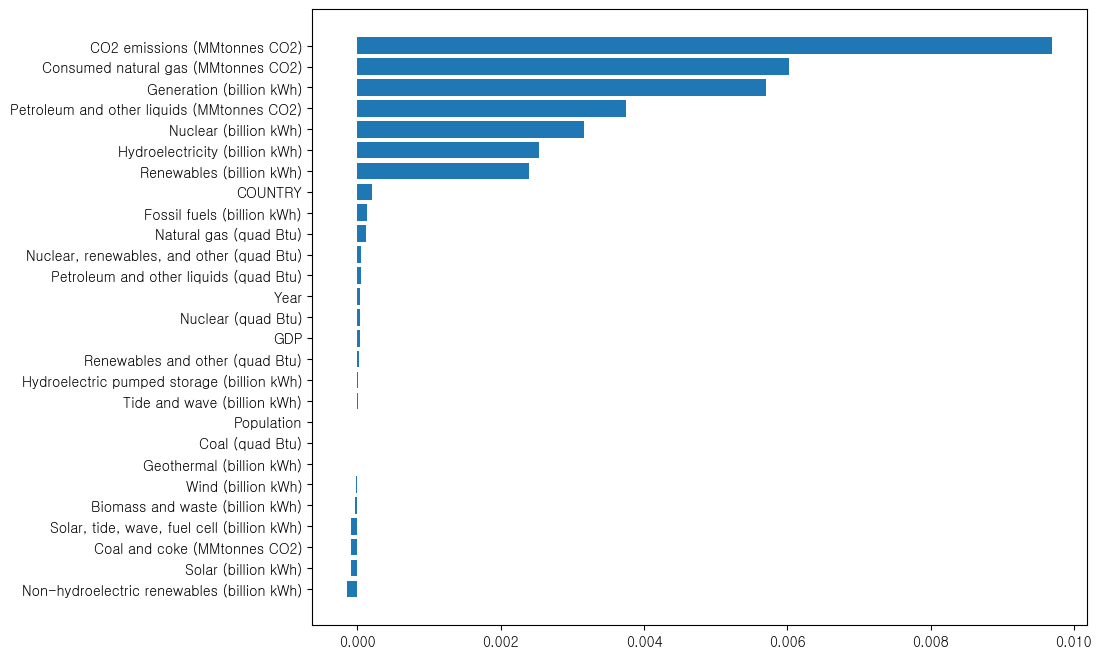

In [53]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [45]:
df3.describe()

Composite_Indicators,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,"Nuclear, renewables, and other (quad Btu)",Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh)
count,9660.00000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,...,9660.000000,9660.000000,9660.000000,9.660000e+03,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000
mean,114.50000,2000.500000,2.073410,232.578126,1.049387,99.796681,44.390043,3.787541,90.690231,625.642962,...,0.522760,88.391402,1.379538,5.305504e+04,30.711509,0.324916,0.998843,1.005471,0.006628,2.672044
std,66.39809,12.121546,21.143353,1880.749682,9.107460,865.824852,363.886693,30.525783,764.643922,5344.248527,...,4.310244,692.845906,10.851800,4.240884e+05,267.051964,2.754344,19.047750,19.073880,0.065737,40.616540
min,0.00000,1980.000000,0.000000,0.000000,0.000000,-0.005130,0.000000,0.000000,0.000000,0.000000,...,-0.168214,0.000000,0.000000,0.000000e+00,0.000000,-0.168214,0.000000,0.000000,0.000000,0.000000
25%,57.00000,1990.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.008079,0.063630,0.000000,...,0.000000,0.484886,0.006991,1.709688e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114.50000,2000.500000,0.000000,4.299291,0.000000,0.000081,0.000000,0.092087,0.872160,17.212815,...,0.004995,3.061781,0.043368,3.989538e+03,0.354500,0.004573,0.000000,0.000000,0.000000,0.000000
75%,172.00000,2011.000000,0.049000,43.280036,0.032710,3.333108,6.440262,0.788267,14.704384,143.551025,...,0.073468,23.769775,0.350614,1.576925e+04,5.338566,0.055075,0.001000,0.001000,0.000000,0.000325
max,229.00000,2021.000000,639.969020,35655.030690,173.359051,16460.029080,7948.649507,603.320807,16832.819160,131934.428000,...,100.872893,12188.747950,198.201126,7.907777e+06,7801.504076,72.842014,1036.244409,1037.218409,1.348000,1807.798762


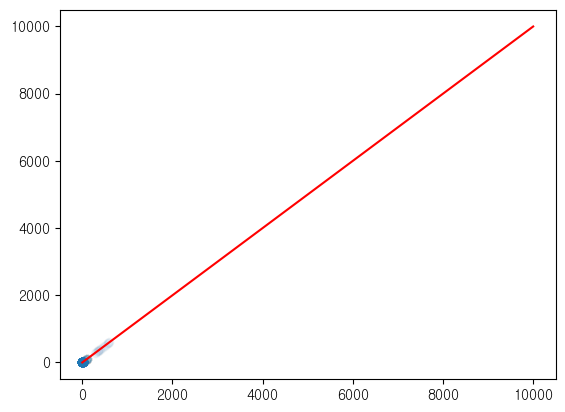

In [54]:
plt.scatter(x = y_test, y = pred, alpha = 0.01)
plt.plot([0, 10000], [0, 10000], 'r-')

In [61]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

# 데이터 복사 및 분할
df3 = df2.copy()
X = df3.drop(['Consumption (quad Btu)'], axis=1)
y = df2['Consumption (quad Btu)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle = False)

# LSTM 입력을 위한 차원 변경
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)

# 예측
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# 계산 지표 출력
trainScore_mae = mean_absolute_error(y_train, trainPredict)
testScore_mae = mean_absolute_error(y_test, testPredict)
trainScore_rmse = np.sqrt(mean_squared_error(y_train, trainPredict))
testScore_rmse = np.sqrt(mean_squared_error(y_test, testPredict))

print("Train Score: %.2f MAE" % (trainScore_mae))
print("Test Score: %.2f MAE" % (testScore_mae))
print("Train Score: %.2f RMSE" % (trainScore_rmse))
print("Test Score: %.2f RMSE" % (testScore_rmse))

r2_score(y_test, testPredict)


Epoch 1/5
6762/6762 [==============================] - 12s 2ms/step - loss: 57.8044
Epoch 2/5
6762/6762 [==============================] - 12s 2ms/step - loss: 57.1613
Epoch 3/5
6762/6762 [==============================] - 14s 2ms/step - loss: 56.5105
Epoch 4/5
6762/6762 [==============================] - 16s 2ms/step - loss: 57.0246
Epoch 5/5
91/91 [==============================] - 0s 2ms/step
Train Score: 2.17 MAE
Test Score: 9.28 MAE
Train Score: 7.55 RMSE
Test Score: 54.62 RMSE


-0.018009432343302878